In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
import sys
from pyts.decomposition import SingularSpectrumAnalysis
from scipy.ndimage import gaussian_filter1d


sys.path.append('../')

from models.SSA import SSA
plt.style.use('seaborn-v0_8-whitegrid')

In [9]:
def moving_average(x, l):
    reduction = (l-1)//2
    moving_average = np.convolve(x, np.ones(l) / l, 'valid')

    left_tail = np.cumsum(x[:reduction]) / np.cumsum(np.ones((reduction,)))
    right_tail = np.cumsum(x[-reduction:]) / np.cumsum(np.ones((reduction,)))

    return np.concatenate([left_tail, moving_average, right_tail])

def plot_smoothed_series(original, *args, save_name = None):
    plt.plot(original, label = 'original', color = 'blue')
    for ts, name in args:
        plt.plot(ts, label = name)
    plt.ylabel('Значение ряда')
    plt.xlabel('Временная шкала')
    plt.legend()
    if save_name is not None:
        plt.savefig(save_name)

    plt.show();

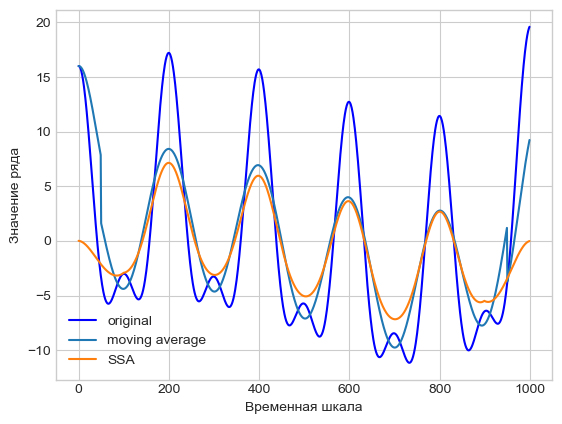

In [10]:
PATH = path.join(r"C:\Users\Никита\SSA", r"data\poly_cos_exp.npy")
ts = np.load(PATH)

ssa = SSA(l = 101, rank = 1)
ssa_smoothed, _ = ssa.transform_to_series(ts)

#kernel_smoothed = gaussian_filter1d(ts, 20)

mov_average = moving_average(ts, l = 101)
plot_smoothed_series(ts, (mov_average, 'moving average'), (ssa_smoothed[0,:], 'SSA'), save_name = 'ssa_moving_average.png')
# действительно похожи, но не эквивалентны